In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import os
Root = "/content/drive/MyDrive/dataset"
os.chdir(Root)

In [22]:
import numpy as np
import pandas as pd
import os
from os import listdir
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

In [23]:
# testing image shape for training
image_train_path = "/content/drive/MyDrive/dataset/Train/0"
for images in os.listdir(image_train_path):
  img = cv2.imread(images)

In [24]:
data_dir = "/content/drive/MyDrive/dataset"
train_path = 'Train'
test_path = 'Test'

# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

In [25]:
TrafficSignCategories = len(os.listdir(train_path))
# NUM_CATEGORIES
print(TrafficSignCategories)

43


In [26]:
# creating a csv file that contains all the classifiable Traffic Sign with specific classID
# read the file 
CategoriesNames = open("/content/drive/MyDrive/dataset/TrafficSignCategories.csv").read().strip().split("\n")[1:]
CategoriesNames = [l.split(",")[1] for l in CategoriesNames]
print(CategoriesNames)

['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing', 'No passing for vehicles over 3.5 metric tons', 'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vehicles', 'Vehicles over 3.5 metric tons prohibited', 'No entry', 'General caution', 'Dangerous curve to the left', 'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing', 'End of all speed and passing limits', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left', 'Roundabout mandatory', 'End of no passing', 'End of no passing by vehicles over 3.5 metric tons']


In [27]:
# Labeling each classifiable Traffic Sign with a specific number
CategoriesNames = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

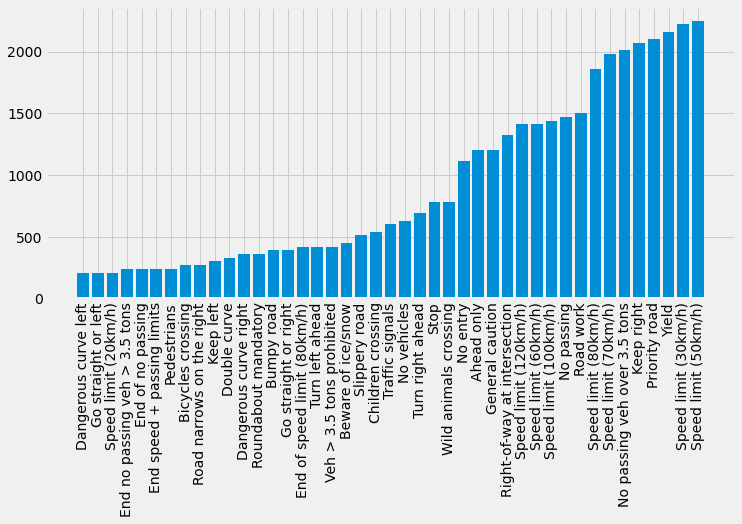

In [28]:
# visualizing the dataSet 

folders = os.listdir(train_path)

train_number = []
class_num = []

# matching each keys in CategoriesNames dictionary 
for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(CategoriesNames[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(11,5))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

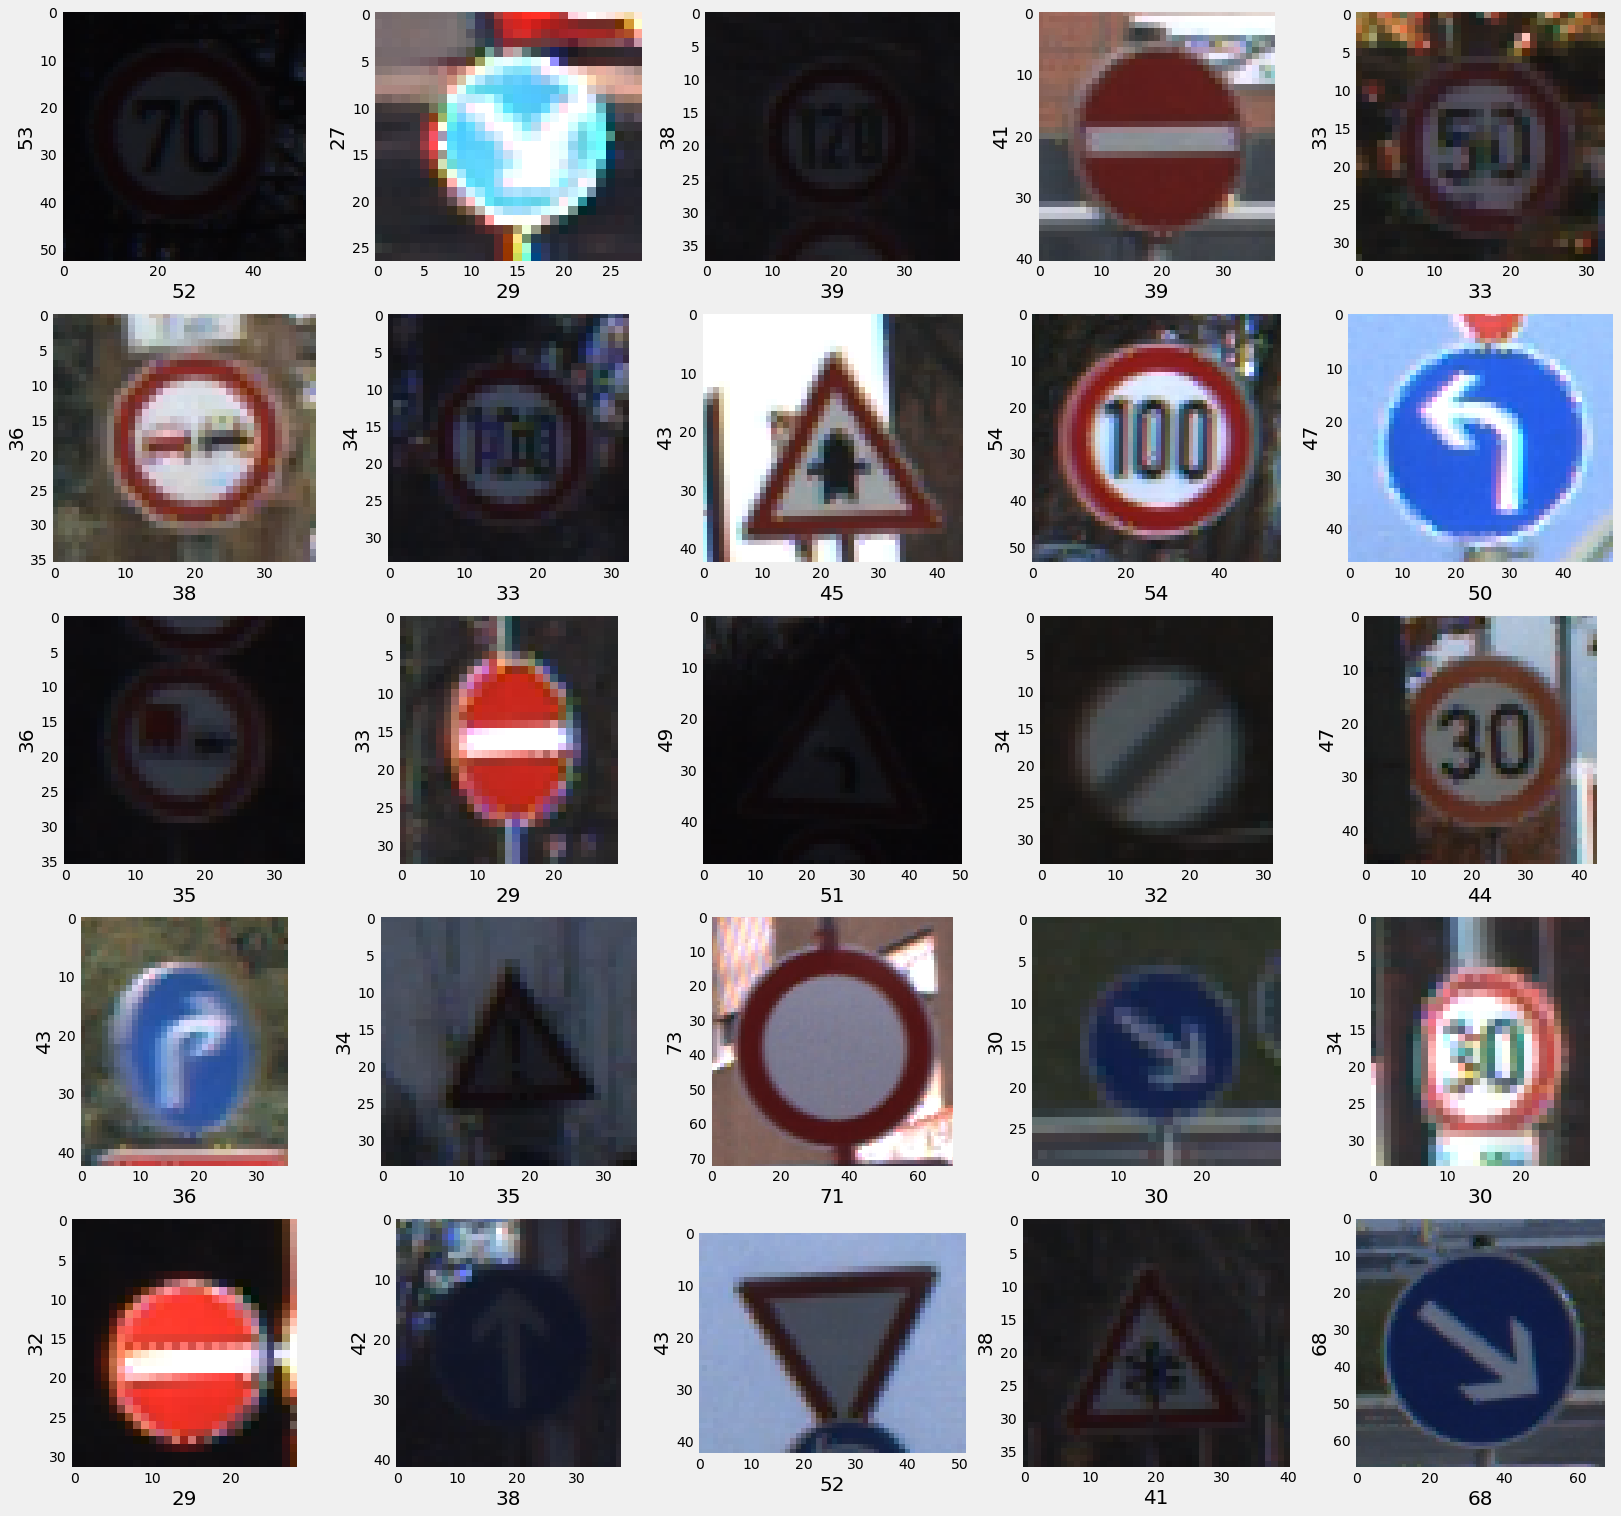

In [29]:
# Visualizing 25 random images from test data
import random
from matplotlib.image import imread

test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    #width of image
    plt.xlabel(rand_img.shape[1], fontsize = 20)
    #height of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)

In [30]:
image_data = []
image_labels = []

for i in range(TrafficSignCategories):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39209, 30, 30, 3) (39209,)


In [31]:
# Shuffling the training data
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [32]:
# Splitting the data into train and validation set
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


In [33]:
# One hot encoding the labels
y_train = keras.utils.to_categorical(y_train, TrafficSignCategories)
y_val = keras.utils.to_categorical(y_val, TrafficSignCategories)

print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


In [34]:
# Making the model
model1 = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])

model2 = keras.models.Sequential([
    # CONV => RELU => BN => POOL
    keras.layers.Conv2D(filters=8, kernel_size=(5,5), padding="same", input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    keras.layers.Activation(activation='relu'),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    # first set of (CONV => RELU => CONV => RELU) * 2 => POOL
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu' , padding="same"),
    # keras.layers.Activation(activation='relu'),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Conv2D(filters=16, kernel_size=(3,3),activation='relu', padding="same"),
    # keras.layers.Activation(activation='relu'),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    # second set of (CONV => RELU => CONV => RELU) * 2 => POOL
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding="same"),
    keras.layers.Activation(activation='relu'),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding="same"),
    keras.layers.Activation(activation='relu'),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    # first set of FC => RELU layers
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    # second set of FC => RELU layers
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),

    keras.layers.Dense(43, activation='softmax')
])


In [35]:
lr = 0.001
epochs = 30

opt = Adam(lr=lr, decay=lr / (epochs * 0.5))
# model1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


## Augmenting the data and training the model

In [36]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

# test model1
# history = model1.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))
# test model2
history = model2.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))


Epoch 1/30
858/858 [==============================] - 63s 71ms/step - loss: 3.0395 - accuracy: 0.2163 - val_loss: 1.5942 - val_accuracy: 0.4746
Epoch 2/30
858/858 [==============================] - 59s 68ms/step - loss: 1.5541 - accuracy: 0.5064 - val_loss: 0.7674 - val_accuracy: 0.7493
Epoch 3/30
858/858 [==============================] - 59s 69ms/step - loss: 1.0146 - accuracy: 0.6720 - val_loss: 0.4820 - val_accuracy: 0.8435
Epoch 4/30
858/858 [==============================] - 61s 71ms/step - loss: 0.7335 - accuracy: 0.7642 - val_loss: 0.3320 - val_accuracy: 0.8896
Epoch 5/30
858/858 [==============================] - 59s 69ms/step - loss: 0.5737 - accuracy: 0.8190 - val_loss: 0.2076 - val_accuracy: 0.9385
Epoch 6/30
858/858 [==============================] - 61s 71ms/step - loss: 0.4580 - accuracy: 0.8543 - val_loss: 0.1392 - val_accuracy: 0.9591
Epoch 7/30
858/858 [==============================] - 59s 69ms/step - loss: 0.3946 - accuracy: 0.8763 - val_loss: 0.1138 - val_accuracy:

In [37]:
# model1.save("/content/drive/MyDrive/ouput_model_training/firstModel/model1.h5")
model2.save("/content/drive/MyDrive/ouput_model_training/secondModel/model.h5")

In [38]:
# model1.save_weights("/content/drive/MyDrive/ouput_model_training/firstModel")
model2.save_weights("/content/drive/MyDrive/ouput_model_training/secondModel")

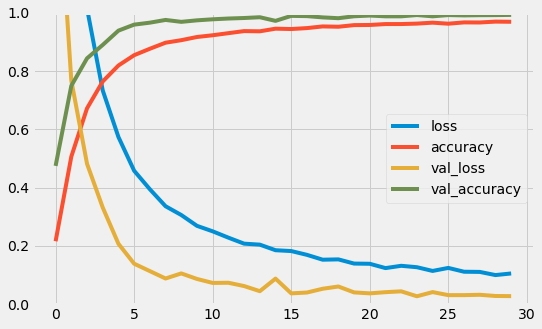

In [39]:
# Evaluating the model
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 30, 30, 8)         608       
                                                                 
 activation_3 (Activation)   (None, 30, 30, 8)         0         
                                                                 
 batch_normalization_13 (Bat  (None, 30, 30, 8)        32        
 chNormalization)                                                
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 15, 15, 8)        0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 15, 15, 16)        1168      
                                                                 
 batch_normalization_14 (Bat  (None, 15, 15, 16)      

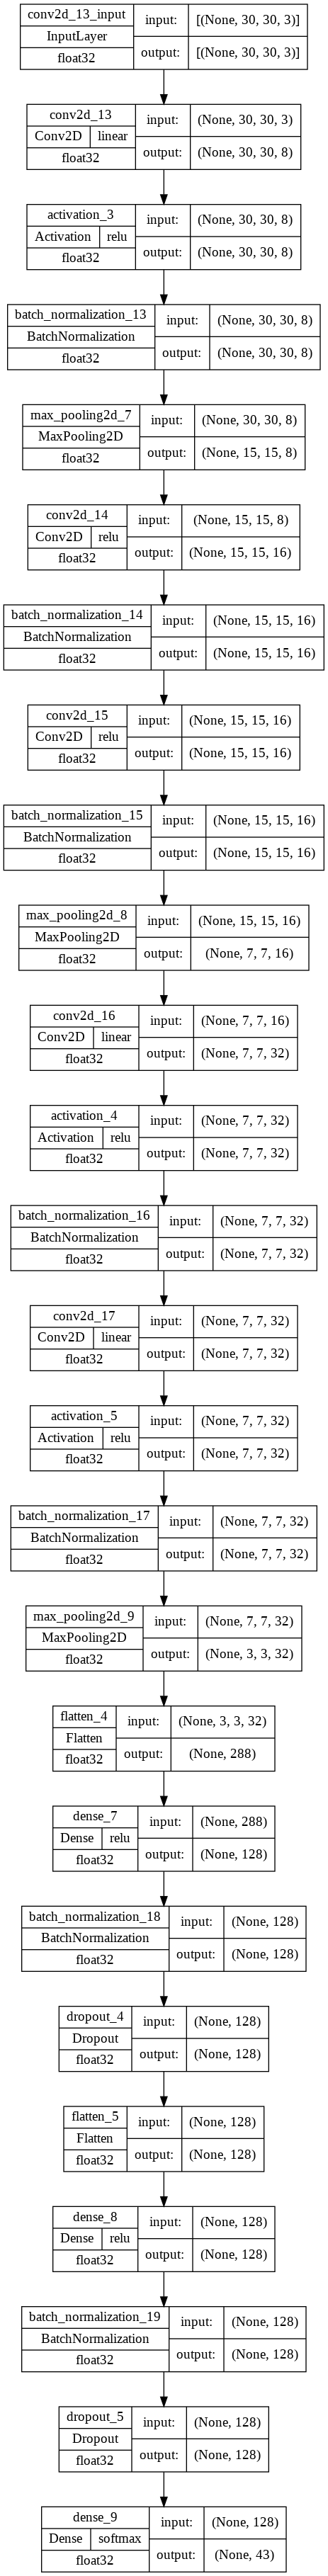

In [40]:
# model1.summary()
# model_img_file = '/content/drive/MyDrive/ouput_model_training/firstModel/firstmodel.png'
# keras.utils.plot_model(model1, to_file=model_img_file, 
#                           show_shapes=True, 
#                           show_layer_activations=True, 
#                           show_dtype=True,
#                           show_layer_names=True )

model2.summary()
model_img_file = '/content/drive/MyDrive/ouput_model_training/secondModel/secondmodel.png'
keras.utils.plot_model(model2, to_file=model_img_file, 
                          show_shapes=True, 
                          show_layer_activations=True, 
                          show_dtype=True,
                          show_layer_names=True )

In [42]:
# prediction
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

pred = model2.predict(X_test)

# # Classification report
# from sklearn.metrics import classification_report


# print(classification_report(labels, pred))

395/395 [==============================] - 6s 15ms/step
